# Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import io
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Least Squares Line

In [6]:
df_with_total_spend = df.assign(
    total_spend = df['TV'] + df['radio'] + df['newspaper']
)

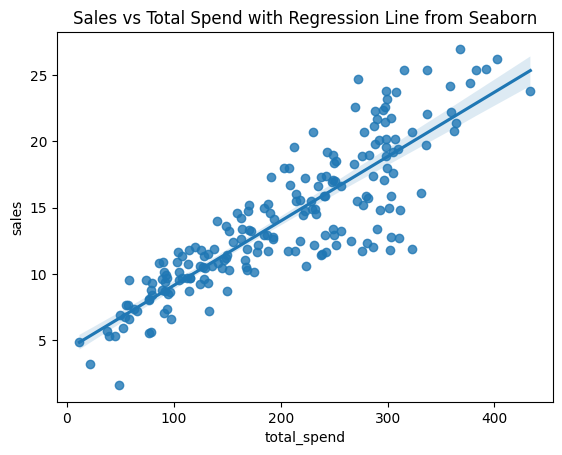

In [8]:
sns.regplot(x='total_spend',y='sales',data=df_with_total_spend)
plt.title('Sales vs Total Spend with Regression Line from Seaborn')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
# Initialize model
linreg = LinearRegression()
# Create Feature and Label
X = df_with_total_spend[['total_spend']].values
y = df_with_total_spend['sales'].values
# Train
linreg.fit(X, y)
# Make predictions
sales_pred_linreg = linreg.predict(X)
# Print coefficients and intercept
print(f"Menggunakan total_spend sebagai feature, didapatkan model: sales = {linreg.coef_[0]:.2f} * total_spend + {linreg.intercept_:.2f}")

Menggunakan total_spend sebagai feature, didapatkan model: sales = 0.05 * total_spend + 4.24


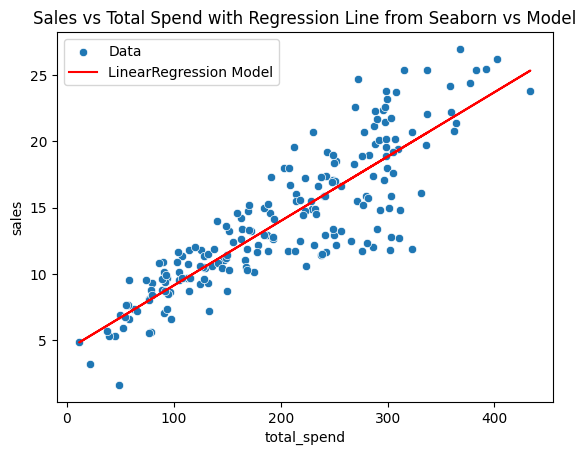

In [11]:
sns.scatterplot(x='total_spend',y='sales',data=df_with_total_spend)
plt.plot(df_with_total_spend['total_spend'], sales_pred_linreg, color='red')
plt.legend(['Data', 'LinearRegression Model'])
plt.title('Sales vs Total Spend with Regression Line from Seaborn vs Model')
plt.show()

Menggunakan total_spend sebagai feature, didapatkan model: sales = 0.05 * total_spend + 4.16


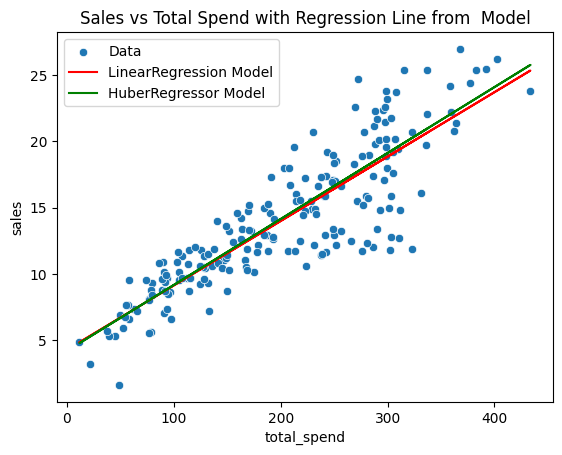

In [12]:
from sklearn.linear_model import HuberRegressor
# Initialize model
huber = HuberRegressor(epsilon=1.5)
# Train
huber.fit(X, y)
# Make predictions
sales_pred_huber = huber.predict(X)
# Print coefficients and intercept
print(f"Menggunakan total_spend sebagai feature, didapatkan model: sales = {huber.coef_[0]:.2f} * total_spend + {huber.intercept_:.2f}")
sns.scatterplot(x='total_spend',y='sales',data=df_with_total_spend)
plt.plot(df_with_total_spend['total_spend'], sales_pred_linreg, color='red')
plt.plot(df_with_total_spend['total_spend'], sales_pred_huber, color='green')
plt.legend(['Data', 'LinearRegression Model', 'HuberRegressor Model'])
plt.title('Sales vs Total Spend with Regression Line from  Model')
plt.show()

Menggunakan total_spend sebagai feature, didapatkan model: sales = 0.00 * total_spend^2 + 0.05 * total_spend + 4.51


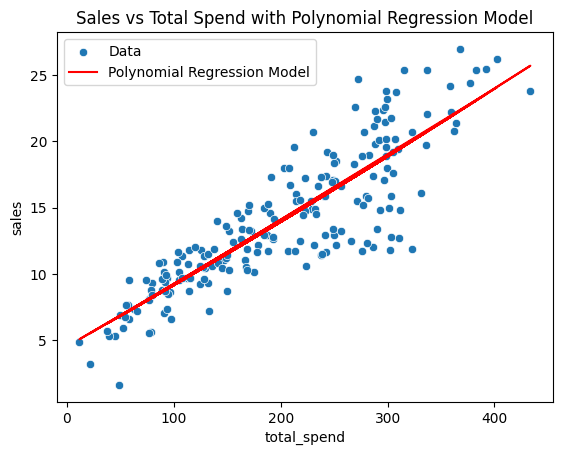

In [13]:
# Non Linear Regression
from sklearn.preprocessing import PolynomialFeatures
# Initialize model
polyfeat = PolynomialFeatures(degree=2)
# Create polynomial features
X_poly = polyfeat.fit_transform(X)
# Initialize model
linreg = LinearRegression()
# Train
linreg.fit(X_poly, y)
# Make predictions
sales_pred_poly = linreg.predict(X_poly)
# Print coefficients and intercept
print(f"Menggunakan total_spend sebagai feature, didapatkan model: sales = {linreg.coef_[2]:.2f} * total_spend^2 + {linreg.coef_[1]:.2f} * total_spend + {linreg.intercept_:.2f}")
sns.scatterplot(x='total_spend',y='sales',data=df_with_total_spend)
plt.plot(df_with_total_spend['total_spend'], sales_pred_poly, color='red')
plt.legend(['Data', 'Polynomial Regression Model'])
plt.title('Sales vs Total Spend with Polynomial Regression Model')
plt.show()

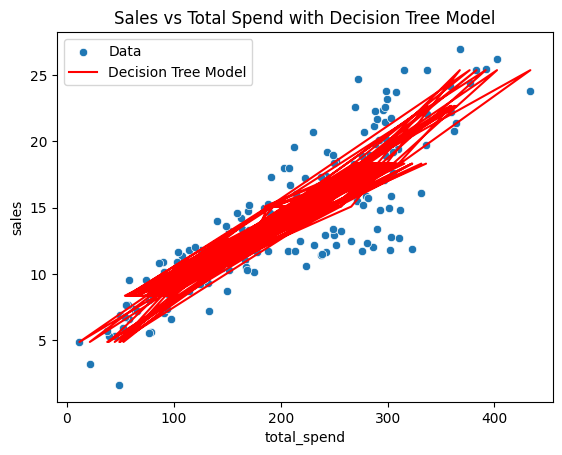

In [14]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Initialize model
tree = DecisionTreeRegressor(max_depth=3)
# Train
tree.fit(X, y)
# Make predictions
sales_pred_tree = tree.predict(X)
sns.scatterplot(x='total_spend',y='sales',data=df_with_total_spend)
plt.plot(df_with_total_spend['total_spend'], sales_pred_tree, color='red')
plt.legend(['Data', 'Decision Tree Model'])
plt.title('Sales vs Total Spend with Decision Tree Model')
plt.show()

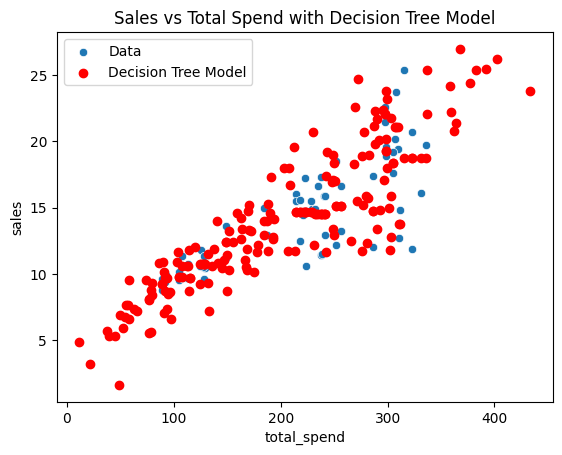

In [15]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Initialize model
tree = DecisionTreeRegressor(max_depth=10)
# Train
tree.fit(X, y)
# Make predictions
sales_pred_tree = tree.predict(X)
sns.scatterplot(x='total_spend',y='sales',data=df_with_total_spend)
plt.scatter(df_with_total_spend['total_spend'], sales_pred_tree, color='red')
plt.legend(['Data', 'Decision Tree Model'])
plt.title('Sales vs Total Spend with Decision Tree Model')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Linear Regression
print('Linear Regression')
print('MSE:', mean_squared_error(y, sales_pred_linreg))
print('RMSE:', np.sqrt(mean_squared_error(y, sales_pred_linreg)))
print('MAE:', mean_absolute_error(y, sales_pred_linreg))
print('R^2:', r2_score(y, sales_pred_linreg))
print('----------------')
# Huber Regression
print('Huber Regression')
print('MSE:', mean_squared_error(y, sales_pred_huber))
print('RMSE:', np.sqrt(mean_squared_error(y, sales_pred_huber)))
print('MAE:', mean_absolute_error(y, sales_pred_huber))
print('R^2:', r2_score(y, sales_pred_huber))
print('----------------')
# Polynomial Regression
print('Polynomial Regression')
print('MSE:', mean_squared_error(y, sales_pred_poly))
print('RMSE:', np.sqrt(mean_squared_error(y, sales_pred_poly)))
print('MAE:', mean_absolute_error(y, sales_pred_poly))
print('R^2:', r2_score(y, sales_pred_poly))
print('----------------')
# Decision Tree
print('Decision Tree')
print('MSE:', mean_squared_error(y, sales_pred_tree))
print('RMSE:', np.sqrt(mean_squared_error(y, sales_pred_tree)))
print('MAE:', mean_absolute_error(y, sales_pred_tree))
print('R^2:', r2_score(y, sales_pred_tree))
print('----------------')

Linear Regression
MSE: 6.692219880857798
RMSE: 2.5869325234450544
MAE: 1.9503810431593065
R^2: 0.7529246402599598
----------------
Huber Regression
MSE: 6.727478060618088
RMSE: 2.59373824057442
MAE: 1.9428797679147973
R^2: 0.751622915629995
----------------
Polynomial Regression
MSE: 6.686900601707766
RMSE: 2.5859042135600783
MAE: 1.9503333767172464
R^2: 0.7531210269347776
----------------
Decision Tree
MSE: 1.1865536111111112
RMSE: 1.0892904163312516
MAE: 0.42684444444444436
R^2: 0.9561926885943048
----------------


## Polyfit

In [ ]:
X = df['total_spend']
y = df['sales']

In [ ]:
# Mengeluarkan koefisien!
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

predicted_sales =  0.04868788*potential_spend + 4.24302822

# Lebih dari 1 Variabel

In [17]:
X = df.drop('sales',axis=1)
y = df['sales']

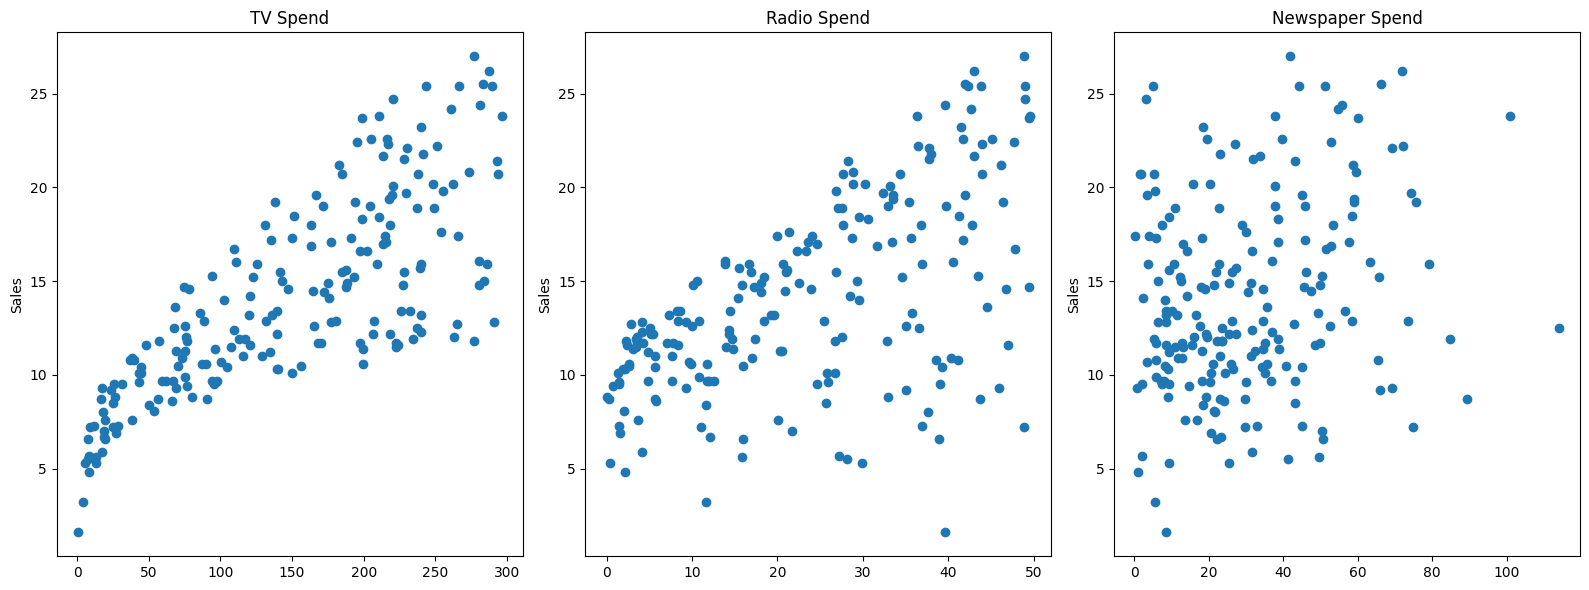

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

# Model Fitting Without Train-test Split

In [22]:
X = df[['TV','radio','newspaper']].values
y = df['sales'].values
# Linear Regression
linreg = LinearRegression()
linreg.fit(X, y)
sales_pred_linreg = linreg.predict(X)
# Huber Regression
huber = HuberRegressor(epsilon=1.5)
huber.fit(X, y)
sales_pred_huber = huber.predict(X)
# Polynomial Regression
polyfeat = PolynomialFeatures(degree=2)
X_poly = polyfeat.fit_transform(X)
linreg.fit(X_poly, y)
sales_pred_poly = linreg.predict(X_poly)
# Decision Tree
tree = DecisionTreeRegressor(max_depth=6)
tree.fit(X, y)
sales_pred_tree = tree.predict(X)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Linear Regression
print('Linear Regression')
print('MSE:', mean_squared_error(y, sales_pred_linreg))
print('RMSE:', np.sqrt(mean_squared_error(y, sales_pred_linreg)))
print('MAE:', mean_absolute_error(y, sales_pred_linreg))
print('R^2:', r2_score(y, sales_pred_linreg))
print('----------------')
# Huber Regression
print('Huber Regression')
print('MSE:', mean_squared_error(y, sales_pred_huber))
print('RMSE:', np.sqrt(mean_squared_error(y, sales_pred_huber)))
print('MAE:', mean_absolute_error(y, sales_pred_huber))
print('R^2:', r2_score(y, sales_pred_huber))
print('----------------')
# Polynomial Regression
print('Polynomial Regression')
print('MSE:', mean_squared_error(y, sales_pred_poly))
print('RMSE:', np.sqrt(mean_squared_error(y, sales_pred_poly)))
print('MAE:', mean_absolute_error(y, sales_pred_poly))
print('R^2:', r2_score(y, sales_pred_poly))
print('----------------')
# Decision Tree
print('Decision Tree')
print('MSE:', mean_squared_error(y, sales_pred_tree))
print('RMSE:', np.sqrt(mean_squared_error(y, sales_pred_tree)))
print('MAE:', mean_absolute_error(y, sales_pred_tree))
print('R^2:', r2_score(y, sales_pred_tree))
print('----------------')

Linear Regression
MSE: 2.784126314510936
RMSE: 1.6685701407225697
MAE: 1.252011229687068
R^2: 0.8972106381789522
----------------
Huber Regression
MSE: 2.8644920782980035
RMSE: 1.6924810422270624
MAE: 1.213748840996332
R^2: 0.8942435509714219
----------------
Polynomial Regression
MSE: 0.36550197282192093
RMSE: 0.6045675916073577
MAE: 0.41838261194297544
R^2: 0.9865057435307856
----------------
Decision Tree
MSE: 0.17466628968253964
RMSE: 0.4179309628186689
MAE: 0.3138936507936507
R^2: 0.9935513570794031
----------------


## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Membuat model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

## Menguji model

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)

In [ ]:
print(MAE, MSE)

1.213745773614481 2.298716697886379


## Koefisien

In [ ]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.044696
radio,0.187566
newspaper,-0.000323


## Plot prediksi

In [ ]:
y_hat = model.predict(X)

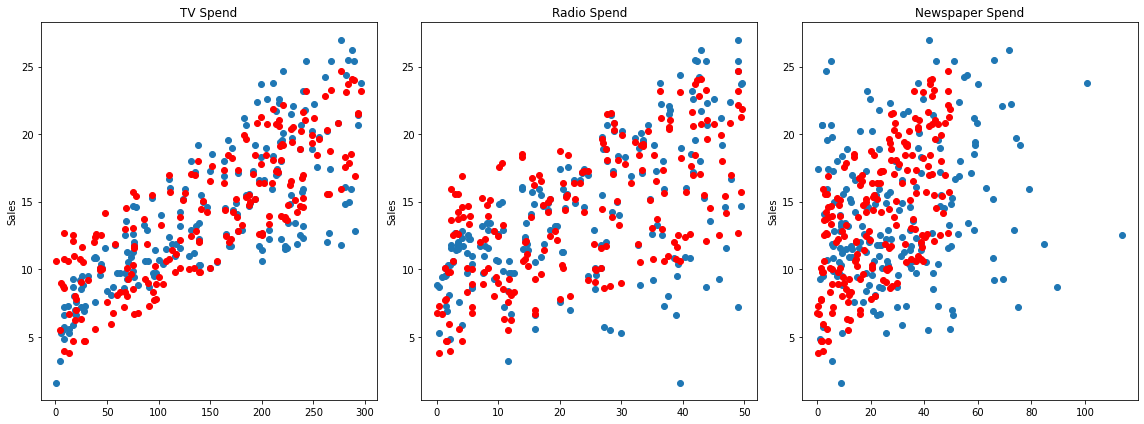

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

## Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Membuat model

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

## Mengevaluasi model

In [ ]:
test_predictions = model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print(MAE, MSE)

0.4896798044803836 0.4417505510403753


# Regularization

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Advertising.csv']))
X = df.drop('sales',axis=1)
y = df['sales']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scale data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train,y_train)
test_predictions = ridge_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print(MAE, MSE)

0.5774404204714162 0.8003783071528355


In [ ]:
# Training Set Performance --> untuk perbandingan
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.528834818302531

### Memilih alpha dengan cross-validation

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [ ]:
test_predictions = ridge_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print(MAE, MSE)

0.4273774884345439 0.3820129881534738


In [ ]:
# Training Set Performance
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.30941321056483123

## Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [ ]:
test_predictions = lasso_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print(MAE, MSE)

0.6541723161252867 1.2787088713079886


## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [ ]:
test_predictions = elastic_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
print(MAE, MSE)

0.5663262117569452 0.560334021463884


# Logistic Regression

## Import Data

In [ ]:
uploaded = files.upload()

Saving hearing_test.csv to hearing_test.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['hearing_test.csv']))
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


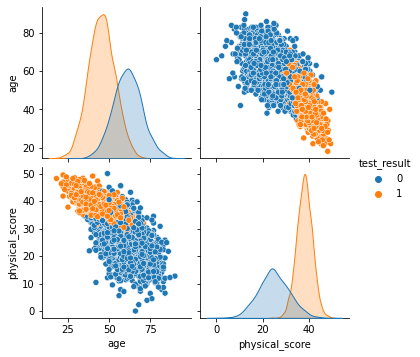

In [ ]:
sns.pairplot(df,hue='test_result')

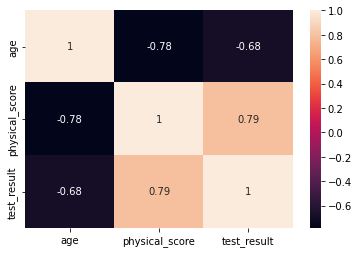

In [ ]:
sns.heatmap(df.corr(),annot=True)

## Train-test split & scale data

In [ ]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

## Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.93

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



## Plot

In [ ]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


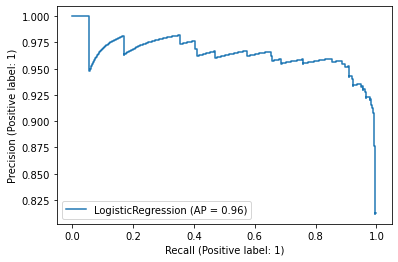

In [ ]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


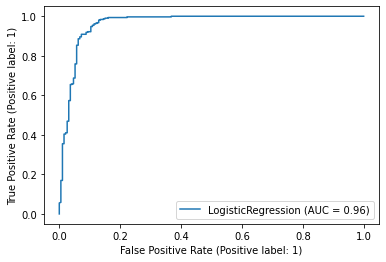

In [ ]:
plot_roc_curve(log_model,scaled_X_test,y_test)